テキスト分類（TensorFlow） - KIKAGAKU
https://www.kikagaku.ai/tutorial/basic_of_nlp/learn/tensorflow_text_classification

※以下のテストデータをルートフォルダにコピーしておく
http://drive.google.com/uc?export=view&id=1J4N95vciIIe5w18eXpC2KYvL0DzUoITd

Colabにはmecabがないのでインストール

In [ ]:
# !apt install aputitude
# !aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
# !pip install mecab-python3==0.7

↑の方法だとMeCab使えなかったので以下参照
MeCabによる形態素解析入門：都知事選のテキストデータで実践！
https://www.codexa.net/mecab-python/

In [ ]:
# # swigのインストール
# !apt install aptitude swig
# #MeCabおよびその他の必要なライブラリのインストール
# !aptitude install mecab libmecab-dev git make curl xz-utils file -y
# #mecab-python3のインストール
# !pip install mecab-python3
# # Unidic-liteのインストール
# !pip install unidic-lite

上記だとchasenが指定できない  
mecabrc が見つからないというエラー. mecab-pytho3 が 1.x… | by 株式会社ジラフ | Medium  
https://medium.com/@jiraffestaff/mecabrc-%E3%81%8C%E8%A6%8B%E3%81%A4%E3%81%8B%E3%82%89%E3%81%AA%E3%81%84%E3%81%A8%E3%81%84%E3%81%86%E3%82%A8%E3%83%A9%E3%83%BC-b3e278e9ed07


In [1]:
!pip install mecab-python3==0.996.5

     |████████████████████████████████| 17.1MB 1.2MB/s 


In [2]:
import MeCab
mecab = MeCab.Tagger ("-Ochasen")
# mecab = MeCab.Tagger ("-Owakati")
# 最新のmecabでは-Ochasen指定だとエラー...
# mecab = MeCab.Tagger()


In [3]:
res = mecab.parse('すもももももももものうち')     
print(res)

すもも	スモモ	すもも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
の	ノ	の	助詞-連体化		
うち	ウチ	うち	名詞-非自立-副詞可能		
EOS



最新-Ochase無指定の場合
```
すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nの\tノ\tノ\tの\t助詞-格助詞\t\t\t\nうち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0\nEOS\n
```

In [4]:
res

'すもも\tスモモ\tすもも\t名詞-一般\t\t\nも\tモ\tも\t助詞-係助詞\t\t\nもも\tモモ\tもも\t名詞-一般\t\t\nも\tモ\tも\t助詞-係助詞\t\t\nもも\tモモ\tもも\t名詞-一般\t\t\nの\tノ\tの\t助詞-連体化\t\t\nうち\tウチ\tうち\t名詞-非自立-副詞可能\t\t\nEOS\n'

In [5]:
text1 = 'キカガクでは、ディープラーニングを含んだ機械学習や人工知能の教育を行っています。'
text2 = '代表の吉崎は大学院では機械学習・ロボットのシステム制御、画像処理の研究に携わっていました。'
text3 = '機械学習、システム制御、画像処理ではすべて線形代数とプログラミングが不可欠になります。'

res = mecab.parse(text1)
print(res)

キカガク	キカガク	キカガク	名詞-一般		
で	デ	で	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
、	、	、	記号-読点		
ディープラーニング	ディープラーニング	ディープラーニング	名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
含ん	フクン	含む	動詞-自立	五段・マ行	連用タ接続
だ	ダ	だ	助動詞	特殊・タ	基本形
機械	キカイ	機械	名詞-一般		
学習	ガクシュウ	学習	名詞-サ変接続		
や	ヤ	や	助詞-並立助詞		
人工	ジンコウ	人工	名詞-一般		
知能	チノウ	知能	名詞-一般		
の	ノ	の	助詞-連体化		
教育	キョウイク	教育	名詞-サ変接続		
を	ヲ	を	助詞-格助詞-一般		
行っ	オコナッ	行う	動詞-自立	五段・ワ行促音便	連用タ接続
て	テ	て	助詞-接続助詞		
い	イ	いる	動詞-非自立	一段	連用形
ます	マス	ます	助動詞	特殊・マス	基本形
。	。	。	記号-句点		
EOS



※-Ochasen指定なしのばあい
```
キカガク	キカガク	キカガク	キカガク	名詞-普通名詞-一般			0
で	デ	デ	で	助詞-格助詞			
は	ワ	ハ	は	助詞-係助詞			
、			、	補助記号-読点			
ディープ	ディープ	ディープ	ディープ-deep	名詞-普通名詞-形状詞可能			1
ラーニング	ラーニング	ラーニング	ラーニング-learning	名詞-普通名詞-一般			1
を	オ	ヲ	を	助詞-格助詞			
含ん	フクン	フクム	含む	動詞-一般	五段-マ行	連用形-撥音便	2
だ	ダ	タ	た	助動詞	助動詞-タ	連体形-一般	
...
EOS
```

In [6]:
# 改行ごとに分割し、リストに格納
res.split('\n') 

['キカガク\tキカガク\tキカガク\t名詞-一般\t\t',
 'で\tデ\tで\t助詞-格助詞-一般\t\t',
 'は\tハ\tは\t助詞-係助詞\t\t',
 '、\t、\t、\t記号-読点\t\t',
 'ディープラーニング\tディープラーニング\tディープラーニング\t名詞-一般\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続',
 'だ\tダ\tだ\t助動詞\t特殊・タ\t基本形',
 '機械\tキカイ\t機械\t名詞-一般\t\t',
 '学習\tガクシュウ\t学習\t名詞-サ変接続\t\t',
 'や\tヤ\tや\t助詞-並立助詞\t\t',
 '人工\tジンコウ\t人工\t名詞-一般\t\t',
 '知能\tチノウ\t知能\t名詞-一般\t\t',
 'の\tノ\tの\t助詞-連体化\t\t',
 '教育\tキョウイク\t教育\t名詞-サ変接続\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続',
 'て\tテ\tて\t助詞-接続助詞\t\t',
 'い\tイ\tいる\t動詞-非自立\t一段\t連用形',
 'ます\tマス\tます\t助動詞\t特殊・マス\t基本形',
 '。\t。\t。\t記号-句点\t\t',
 'EOS',
 '']

以下を削除
```
 'EOS',
 '']
```

In [7]:
# 最後の 2 つの要素までをスライス
res.split('\n')[:-2]

['キカガク\tキカガク\tキカガク\t名詞-一般\t\t',
 'で\tデ\tで\t助詞-格助詞-一般\t\t',
 'は\tハ\tは\t助詞-係助詞\t\t',
 '、\t、\t、\t記号-読点\t\t',
 'ディープラーニング\tディープラーニング\tディープラーニング\t名詞-一般\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続',
 'だ\tダ\tだ\t助動詞\t特殊・タ\t基本形',
 '機械\tキカイ\t機械\t名詞-一般\t\t',
 '学習\tガクシュウ\t学習\t名詞-サ変接続\t\t',
 'や\tヤ\tや\t助詞-並立助詞\t\t',
 '人工\tジンコウ\t人工\t名詞-一般\t\t',
 '知能\tチノウ\t知能\t名詞-一般\t\t',
 'の\tノ\tの\t助詞-連体化\t\t',
 '教育\tキョウイク\t教育\t名詞-サ変接続\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続',
 'て\tテ\tて\t助詞-接続助詞\t\t',
 'い\tイ\tいる\t動詞-非自立\t一段\t連用形',
 'ます\tマス\tます\t助動詞\t特殊・マス\t基本形',
 '。\t。\t。\t記号-句点\t\t']

In [8]:
res.split('\n')[0]

'キカガク\tキカガク\tキカガク\t名詞-一般\t\t'

In [9]:
# 品詞の取得
res.split('\n')[0].split('\t')[3]
# → '名詞-一般'
# -Ochasen無指定の場合は[3]→[4]に
# res.split('\n')[0].split('\t')[4]
# → '名詞-普通名詞-一般'


'名詞-一般'

In [10]:
# 名詞の単語をリストに格納
nouns = []
res = mecab.parse(text1)
words = res.split('\n')[:-2]
for word in words:
  part = word.split('\t')
  if '名詞' in part[3]:
  # if '名詞' in part[4]:
    nouns.append(part[0])
nouns

['キカガク', 'ディープラーニング', '機械', '学習', '人工', '知能', '教育']

In [11]:
def get_nouns(text):
  nouns = []
  res = mecab.parse(text)
  words = res.split('\n')[:-2]
  for word in words:
    part = word.split('\t')
    if '名詞' in part[3]:
      nouns.append(part[0])
  return(nouns)

In [12]:
nouns1 = get_nouns(text1)
nouns2 = get_nouns(text2)
nouns3 = get_nouns(text3)
print(nouns1)
print(nouns2)
print(nouns3)

['キカガク', 'ディープラーニング', '機械', '学習', '人工', '知能', '教育']
['代表', '吉崎', '大学院', '機械', '学習', 'ロボット', 'システム', '制御', '画像', '処理', '研究']
['機械', '学習', 'システム', '制御', '画像', '処理', 'すべて', '線形', '代数', 'プログラミング', '不可欠']


## BOW(Bag of words)の実装

In [13]:
# scikit-learnで実装するため単語をスペースでつなぐ
nouns_list = [nouns1, nouns2, nouns3]
corpus = []
for nouns in nouns_list:
  corpus.append(' '.join(nouns))
corpus

['キカガク ディープラーニング 機械 学習 人工 知能 教育',
 '代表 吉崎 大学院 機械 学習 ロボット システム 制御 画像 処理 研究',
 '機械 学習 システム 制御 画像 処理 すべて 線形 代数 プログラミング 不可欠']

CountVectorizeクラスのfit_transformメソッドで、
*   単語毎にID割り付け
*   IDの出現回数をもとにベクトル化



In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(corpus)

In [15]:
vectorizer.vocabulary_

{'すべて': 0,
 'キカガク': 1,
 'システム': 2,
 'ディープラーニング': 3,
 'プログラミング': 4,
 'ロボット': 5,
 '不可欠': 6,
 '人工': 7,
 '代数': 8,
 '代表': 9,
 '処理': 10,
 '制御': 11,
 '吉崎': 12,
 '大学院': 13,
 '学習': 14,
 '教育': 15,
 '機械': 16,
 '画像': 17,
 '知能': 18,
 '研究': 19,
 '線形': 20}

In [16]:
x = x.toarray()
print(x)

[[0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0]
 [1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1]]


## 文書分類の実装

In [ ]:
# ファイルをコードからアップロードする場合
# from google.colab import files
# uploaded = files.upload()
# http://drive.google.com/uc?export=view&id=1J4N95vciIIe5w18eXpC2KYvL0DzUoITd

In [17]:
# 解凍コマンド
# !unzip -d text texts.zip
# 解凍したファイルの確認
!ls text/

ls: cannot access 'text/': No such file or directory


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ファイル/ディレクトリ操作用パッケージ   
from glob import glob

In [ ]:
# text ディレクトリ以下のディレクトリの取得
directories = glob('text/*')
directories

['text/livedoor-homme',
 'text/movie-enter',
 'text/it-life-hack',
 'text/topic-news',
 'text/smax',
 'text/peachy',
 'text/kaden-channel',
 'text/sports-watch']

In [ ]:
# 不要ファイル削除
import os
licensefiles = glob('text/*/LICENSE.txt')
print(licensefiles)
for licensefile in licensefiles:
  os.remove(licensefile)

[]


In [ ]:
filepaths = glob(f'{directories[0]}/*.txt')
print(filepaths[:3])

['text/livedoor-homme/livedoor-homme-4801409.txt', 'text/livedoor-homme/livedoor-homme-4636784.txt', 'text/livedoor-homme/livedoor-homme-5733881.txt']


In [ ]:
# 先頭2行(URL/日時)を除く
# 記事固有の記述削除
with open(filepaths[0], encoding='utf-8') as f:
  text = ''.join(f.readlines()[2:])
  text.replace('【Sports Watch】','')
print(text)

アンブロがサッカー・イングランド代表を応援「LOVE ENGLAND 2010」
英国生まれのサッカーブランド「アンブロ」が、英国関連企業4社と共同で、サッカー・イングランド代表チーム応援キャンペーン「LOVE ENGLAND 2010」を展開する。

サッカー・イングランド代表チームのオフィシャルサプライヤーを務めるアンブロが、英国関連企業の「ヴァージンアトランティック航空」「HMV ジャパン」「ハブ」「R.NEWBOLD」の4社とコラボレーション。6月11日に開幕するサッカーのワールドカップ南アフリカ大会を盛り上げる。

■R.NEWBOLD
6月1日から、R.NEWBOLD代官山店、大阪堀江店をメインに6店舗で、「LOVE ENGLAND 2010展」を開催。イングランド代表チームの歴代ユニフォームや写真などが掲出されるほか、腕時計、Tシャツ、ポロシャツなどのコラボレーショングッズを販売する。

■ヴァージンアトランティック航空
6月19日に東京・大崎のThinkPark Arenaでフットサル大会を開催する。優勝チームには、東京—ロンドン間の往復航空券5人分のほか、イングランド・プレミアリーグの観戦チケットが贈られる。さらに、ヴァージンアトランティック航空の公式サイトから、東京—ロンドンの往復航空券を予約・購入した日本在住者にイングランド代表のユニフォームをプレゼントする。

■ハブ
英国風パブ「HUB」では、イングランド戦時のパーティ予約者にイングランド代表ユニフォームをプレゼントする。オリジナルカクテル「HUB LOVE ENGLAND」も販売する。

■HMV ジャパン
6月1日から、「HMV FOOTBALL CAMPAIGN 〜4年に一度のサッカーの祭典」を実施。キャンペーン対象商品の購入者に、アンブロオリジナルのクリアファイルやステッカーをプレゼントする。


さらに、アンブロは、過去のワールドカップ優勝国（アルゼンチン、ブラジル、イングランド、フランス、ドイツ、イタリア、ウルグアイ）のユニフォームをイメージしたシャツ「ワールドチャンピオンズ・コレクション」を発売する。


ワールドカップ優勝国のユニフォームをイメージした「ワールドチャンピオンズ・コレクション」
左からイタリア、ブラジル、ドイツ、アルゼンチン、ウルグアイ、イングランド、フランス


In [ ]:
for directory in directories:
  files = glob(f'{directory}/*.txt')
  with open(files[0], encoding='utf-8') as f:
    text = ''.join(f.readlines()[2])
    # text.replace('【Sports Watch】','')
    print(files[0])
    print(text)

text/livedoor-homme/livedoor-homme-4801409.txt
アンブロがサッカー・イングランド代表を応援「LOVE ENGLAND 2010」

text/movie-enter/movie-enter-6254765.txt
映画鑑賞が“生涯無料”になる

text/it-life-hack/it-life-hack-6298594.txt
ネットで気軽にフォトブックの編集注文ができる！「ドリームページ」のレビューアーを30名募集

text/topic-news/topic-news-6792781.txt
米誌「TIME」表紙の澤穂希が「かっこいい」とネット掲示板で絶賛される

text/smax/smax-6671148.txt
Microsoft、Windows 8またはWindows RT搭載10.6インチタブレット「Surface」を発表

text/peachy/peachy-5069309.txt
科学の力で肌がよみがえる？韓国発最先端「幹細胞コスメ」に注目！

text/kaden-channel/kaden-channel-6014272.txt
ソニー・エリクソン完全子会社化で、スマホを含めたシームレス事業の展開を 目指すソニー【話題】

text/sports-watch/sports-watch-6558240.txt
「チャンスはある」 ベッカムがロンドン五輪で代表復帰か



全てのファイルを読み込んでラベル付け

In [ ]:
texts, labels, label_names = [], [], []
for (i, directory) in enumerate(directories):
  filepsths = glob(f'{directory}/*.txt')
  for filepath in filepaths:
    with open(filepath, encoding='utf-8') as f:
      text = ''.join(f.readlines()[2:])
      texts.append(text)
      labels.append(i)
      label_names.append(directory.replace('text/',''))
print(len(texts),len(labels),len(label_names))
print(texts[0])

4088 4088 4088
アンブロがサッカー・イングランド代表を応援「LOVE ENGLAND 2010」
英国生まれのサッカーブランド「アンブロ」が、英国関連企業4社と共同で、サッカー・イングランド代表チーム応援キャンペーン「LOVE ENGLAND 2010」を展開する。

サッカー・イングランド代表チームのオフィシャルサプライヤーを務めるアンブロが、英国関連企業の「ヴァージンアトランティック航空」「HMV ジャパン」「ハブ」「R.NEWBOLD」の4社とコラボレーション。6月11日に開幕するサッカーのワールドカップ南アフリカ大会を盛り上げる。

■R.NEWBOLD
6月1日から、R.NEWBOLD代官山店、大阪堀江店をメインに6店舗で、「LOVE ENGLAND 2010展」を開催。イングランド代表チームの歴代ユニフォームや写真などが掲出されるほか、腕時計、Tシャツ、ポロシャツなどのコラボレーショングッズを販売する。

■ヴァージンアトランティック航空
6月19日に東京・大崎のThinkPark Arenaでフットサル大会を開催する。優勝チームには、東京—ロンドン間の往復航空券5人分のほか、イングランド・プレミアリーグの観戦チケットが贈られる。さらに、ヴァージンアトランティック航空の公式サイトから、東京—ロンドンの往復航空券を予約・購入した日本在住者にイングランド代表のユニフォームをプレゼントする。

■ハブ
英国風パブ「HUB」では、イングランド戦時のパーティ予約者にイングランド代表ユニフォームをプレゼントする。オリジナルカクテル「HUB LOVE ENGLAND」も販売する。

■HMV ジャパン
6月1日から、「HMV FOOTBALL CAMPAIGN 〜4年に一度のサッカーの祭典」を実施。キャンペーン対象商品の購入者に、アンブロオリジナルのクリアファイルやステッカーをプレゼントする。


さらに、アンブロは、過去のワールドカップ優勝国（アルゼンチン、ブラジル、イングランド、フランス、ドイツ、イタリア、ウルグアイ）のユニフォームをイメージしたシャツ「ワールドチャンピオンズ・コレクション」を発売する。


ワールドカップ優勝国のユニフォームをイメージした「ワールドチャンピオンズ・コレクション」
左からイタリア、ブラジル、ドイツ、アルゼンチン、ウルグ

In [ ]:
# CSVとして保存
# Pythonでcsvファイルへの書き出し(list,numpy,pandas対応) | 超初心者向けPython入門講座
# https://work-life-enj.com/pyhon-write-csv/

features, label_names = [], []
for (i, directory) in enumerate(directories):
  filepsths = glob(f'{directory}/*.txt')
  for filepath in filepaths:
    with open(filepath, encoding='utf-8') as f:
      text = ''.join(f.readlines()[2:])
      features.append([text])
      label_names.append([directory.replace('text/','')])
print(len(features),len(label_names))
print(features[0])

import csv
from google.colab import files

f = open('features_all.csv', 'w')
writer = csv.writer(f)
writer.writerow(['feature'])
writer.writerows(features)
f.close()

f = open('labels_all.csv', 'w')
writer = csv.writer(f)
writer.writerow(['label'])
writer.writerows(label_names)
f.close()

files.download('features_all.csv')
files.download('labels_all.csv')
# files.download('text_label_num.csv')

4088 4088
['アンブロがサッカー・イングランド代表を応援「LOVE ENGLAND 2010」\n英国生まれのサッカーブランド「アンブロ」が、英国関連企業4社と共同で、サッカー・イングランド代表チーム応援キャンペーン「LOVE ENGLAND 2010」を展開する。\n\nサッカー・イングランド代表チームのオフィシャルサプライヤーを務めるアンブロが、英国関連企業の「ヴァージンアトランティック航空」「HMV ジャパン」「ハブ」「R.NEWBOLD」の4社とコラボレーション。6月11日に開幕するサッカーのワールドカップ南アフリカ大会を盛り上げる。\n\n■R.NEWBOLD\n6月1日から、R.NEWBOLD代官山店、大阪堀江店をメインに6店舗で、「LOVE ENGLAND 2010展」を開催。イングランド代表チームの歴代ユニフォームや写真などが掲出されるほか、腕時計、Tシャツ、ポロシャツなどのコラボレーショングッズを販売する。\n\n■ヴァージンアトランティック航空\n6月19日に東京・大崎のThinkPark Arenaでフットサル大会を開催する。優勝チームには、東京—ロンドン間の往復航空券5人分のほか、イングランド・プレミアリーグの観戦チケットが贈られる。さらに、ヴァージンアトランティック航空の公式サイトから、東京—ロンドンの往復航空券を予約・購入した日本在住者にイングランド代表のユニフォームをプレゼントする。\n\n■ハブ\n英国風パブ「HUB」では、イングランド戦時のパーティ予約者にイングランド代表ユニフォームをプレゼントする。オリジナルカクテル「HUB LOVE ENGLAND」も販売する。\n\n■HMV ジャパン\n6月1日から、「HMV FOOTBALL CAMPAIGN 〜4年に一度のサッカーの祭典」を実施。キャンペーン対象商品の購入者に、アンブロオリジナルのクリアファイルやステッカーをプレゼントする。\n\n\nさらに、アンブロは、過去のワールドカップ優勝国（アルゼンチン、ブラジル、イングランド、フランス、ドイツ、イタリア、ウルグアイ）のユニフォームをイメージしたシャツ「ワールドチャンピオンズ・コレクション」を発売する。\n\n\nワールドカップ優勝国のユニフォームをイメージした「ワールドチャンピオンズ・コレクション」\n左からイタリア、

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split

dict1 = dict(feature=features,label=label_names)
df = pd.DataFrame(data=dict1)
df.head()
# ランダムシード：0、データの並び替え：する
x_train, x_test, t_train, t_test = train_test_split(features, label_names, train_size=0.7, random_state=0)

def list2csv_dl(list,title,csvfile):
  f = open(csvfile, 'w')
  writer = csv.writer(f)
  writer.writerow([title])
  writer.writerows(list)
  f.close()
  files.download(csvfile)
  print(list[:3])

list2csv_dl(x_train,'feature','feature_train.csv')
list2csv_dl(x_test,'feature','feature_test.csv')
list2csv_dl(t_train,'label','label_train.csv')
list2csv_dl(t_test,'label','label_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[['「30歳になっても下っ端のままかも…」 - 辛口説教部屋 vol.12\n「3年で転職は早すぎる？」「将来が見えない」\n「仕事が面白くない」・・・若手社会人の悩みは尽きないもの。\nそんな様々な悩みに辛口4姉妹がお答えします。\n\n\n今回のお悩み\n\nQ：会社に入ってずっと下っ端の仕事ばかり。30歳になっても“使えない人”になってしまうのではないかと不安です。\n\n\n精密機器メーカー・営業\n24歳\u3000男性 <悩める相談者 No.012>\n周りは40代以上ばかり。現在入社3年目ですが、会社の平均年齢が高いためか、いつまでたっても下っ端仕事ばかりが任されています。このままここで働いて30歳になったとき、市場価値の低い人材になっていそうで不安です \n\n\n\n\n山葵(わさび)姐さんからの激辛アドバイス\n\nA：あなたに仕事が任されないのは平均年齢のせいではないわ。\n\nこの山葵姐さんに相談しようなんて、あなたも度胸あるわね。\n\nいきなりだけど、断言するわ。仕事が任されないのはあなたの責任よ。仕事は与えられるものではなく作るもの。あなた転職も視野に入れているようだけど、そんな姿勢で通用するとでも思っているのかしら？いまの環境の中で周囲の期待を超える成果を出していると言える？「自分の業務はここまで」とか言って自分で範囲を決めてない？自分の仕事を広げるための提案は随時行ってる？これらの質問に胸を張って「yes」と答えられるなら、転職すべき。でも「成長できるか不安です…」とか言ってる人に限って、現状に対して文句しか言ってないのよね。 \n\n\n今回の説教\n\n今の環境で120％の努力をしているなら転職すべし。\n\n（情報提供元：@type）\n\nlivedoor求人・転職\nlivedoor求人・転職は、あなたがどんな求人情報を探しているのかを瞬時に判断しておすすめするコンテンツ。「東京都内で年収700万以上の営業職で未経験OK」などあなたのこだわりにマッチする転職活動を完全サポート。\nhttp://type.jp/s/livedoor/\n'], ['PETE ROCKらヒップホップアーティストが渋谷を沸かせたHennessy artistryイベント\n11月4日(金)、渋谷区の代官山にあるイベントスペースAIRでヒップホ

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[['新生活を撮りつくす新オリンパスペン「E-PL1」に死角なし【新生活特集】\n新生活がスタートすれば、新しい出会いや世界が待っています。その一つ一つの出来事が、人生であり、生きていく足跡となります。そうした思い出の1コマを残せる道具がカメラです。\n\n一眼レフデジタルカメラのように大きくもなく、重くもない。バックに入れて手軽に持ち歩ける オリンパス マイクロ一眼「E-Pen」も、気がつけば早くも3世代目が登場しました。\n\n新生活には、今まで知らなかった発見や経験が、いたるところであなたを待っています。\n新しい仕事、新しい友人・同僚、新しい住まいと環境での生活の一瞬を写真として記録する。ケータイやコンパクトデジカメではなく、より高い画質と情報で残しましょう。\n\nただ記録するだけではなく、心に響いた感動を写す。それができるのがマイクロ一眼の魅力です。\n\n一段とコンパクトになった本体は、バッテリーとメモリーカードを入れてもわずか344g。バックの中にすっぽり収まり、瞬時に取り出しシャッターを切る。液晶の中には、あなたの心に響いた世界で1枚の景色が納められています。\n\n\n \nオリンパスペン「E-PL1」 \n\nいつも通る道で、ふと目をとめた小道の草花にマニュアルフォーカスでピントあわせることも、絞りを開けて背景をぼかすことも、E-PL1なら期待を裏切らずに応えてくれることでしょう。\n\nまた、E-PL1には、新生活に役立つ嬉しい機能が追加されています。\n\nその一つが、内蔵ストロボです。暗いシーンでもきれいに撮れるE-Penシリーズですが、E-PL1には本体にストロボが搭載されました。歓迎会や酒宴の席など、記念撮影や集合写真でもシャープできれいな写真をバッチリ残せるほか、照明がまったくない暗いシーンでもフラッシュで一瞬を写しきれるようになりました。\n\n\n \nストロボ内蔵で暗いシーンもシャープに \n\nもう一つは、動画撮影専用ボタンです。\n\nこれまでのように、モードダイヤルを切り替えなくても、構えたままワンプッシュでHD動画を撮影することができます。大切なスピーチや講演、イベントなど、とっさのチャンスも動画で残すことができます。\n\n\n \n動画撮影専用ボタンで動画撮影も簡単 \n\n別売りの電子ビューファインダー「VF-2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[['movie-enter'], ['movie-enter'], ['topic-news']]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[['movie-enter'], ['kaden-channel'], ['topic-news']]


### 文章から名詞のみ取り出す

In [ ]:
word_collect = []
for text in texts:
  nouns = get_nouns(text)
  word_collect.append(' '.join(nouns))
word_collect[0]

'アンブロ サッカー イングランド 代表 応援 LOVE ENGLAND 2010 英国 生まれ サッカー ブランド アンブロ 英国 関連 企業 4 社 共同 サッカー イングランド 代表 チーム 応援 キャンペーン LOVE ENGLAND 2010 展開 サッカー イングランド 代表 チーム オフィシャルサプライヤー アンブロ 英国 関連 企業 ヴァージンアトランティック 航空 HMV ジャパン ハブ R . NEWBOLD 4 社 コラボレーション 6 月 11 日 開幕 サッカー ワールドカップ 南アフリカ 大会 R . NEWBOLD 6 月 1 日 R . NEWBOLD 代官山 店 大阪 堀江 店 メイン 6 店舗 LOVE ENGLAND 2010 展 開催 イングランド 代表 チーム 歴代 ユニフォーム 写真 掲出 ほか 腕時計 Tシャツ ポロシャツ コラボレーション グッズ 販売 ヴァージンアトランティック 航空 6 月 19 日 東京 大崎 ThinkPark Arena フットサル 大会 開催 優勝 チーム 東京 — ロンドン 間 往復 航空 券 5 人 分 ほか イングランド プレミア リーグ 観戦 チケット ヴァージンアトランティック 航空 公式 サイト 東京 — ロンドン 往復 航空 券 予約 購入 日本 在住 者 イングランド 代表 ユニフォーム プレゼント ハブ 英国 風 パブ HUB イングランド 戦時 パーティ 予約 者 イングランド 代表 ユニフォーム プレゼント オリジナル カクテル HUB LOVE ENGLAND 販売 HMV ジャパン 6 月 1 日 HMV FOOTBALL CAMPAIGN 4 年 一 度 サッカー 祭典 実施 キャンペーン 対象 商品 購入 者 アンブロオリジナル クリア ファイル ステッカー プレゼント アンブロ 過去 ワールドカップ 優勝 国 アルゼンチン ブラジル イングランド フランス ドイツ イタリア ウルグアイ ユニフォーム イメージ シャツ ワールド チャンピオンズ コレクション 発売 ワールドカップ 優勝 国 ユニフォーム イメージ ワールド チャンピオンズ コレクション 左 イタリア ブラジル ドイツ アルゼンチン ウルグアイ イングランド フランス 各国 出身 デザイナー 胸 

In [ ]:
print(len(word_collect))

4088


### BoWに変換

In [ ]:
# すべての名詞を辞書にした場合登録数が膨大になるため出現頻度が一定以上に絞る
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=20)
x = vectorizer.fit_transform(word_collect)
x = x.toarray()
# ラベル付けされた単語
print(len(vectorizer.vocabulary_))
# 各テキストのベクター
print(len(x))

4963
4088


In [ ]:
print(vectorizer.vocabulary_)
print(x[0])

{'サッカー': 1117, '代表': 2317, '応援': 3297, '2010': 66, '英国': 4407, '生まれ': 4007, 'ブランド': 1687, '関連': 4835, '企業': 2331, '共同': 2499, 'チーム': 1369, 'キャンペーン': 966, '展開': 3139, '航空': 4382, 'ジャパン': 1180, 'newbold': 371, 'コラボレーション': 1061, '11': 18, '開幕': 4820, 'ワールドカップ': 2068, '南アフリカ': 2667, '大会': 2949, '代官山': 2314, '大阪': 2970, 'メイン': 1876, '店舗': 3205, '開催': 4817, '歴代': 3797, '写真': 2523, '掲出': 3461, 'ほか': 665, '腕時計': 4352, 'tシャツ': 466, 'ポロシャツ': 1806, 'グッズ': 1019, '販売': 4593, '19': 40, '東京': 3705, '優勝': 2441, 'ロンドン': 2045, '往復': 3252, 'プレミア': 1724, '観戦': 4497, 'チケット': 1353, '公式': 2493, 'サイト': 1110, '予約': 2232, '購入': 4619, '日本': 3564, '在住': 2860, 'プレゼント': 1722, 'パーティ': 1582, 'オリジナル': 870, 'カクテル': 892, 'campaign': 230, '祭典': 4177, '実施': 3056, '対象': 3100, '商品': 2818, 'クリア': 996, 'ファイル': 1618, 'ステッカー': 1227, '過去': 4723, 'ブラジル': 1684, 'フランス': 1665, 'ドイツ': 1454, 'イタリア': 773, 'イメージ': 777, 'シャツ': 1144, 'ワールド': 2067, 'コレクション': 1067, '発売': 4051, '各国': 2748, '出身': 2543, 'デザイナー': 1407, 'デザイン': 1409, 'モデル': 1904

array([0, 0, 0, ..., 7, 7, 7], dtype=int32)

In [ ]:
x = x.astype('float32')
t = np.array(labels, 'int32')

In [ ]:
from sklearn.model_selection import train_test_split
# ランダムシード：0、データの並び替え：する
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)
x_train, t_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [4., 3., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([1, 1, 3, ..., 3, 5, 5], dtype=int32))

In [ ]:
print(x_train.shape,t_train.shape,x_test.shape,t_test.shape)

(2861, 4963) (2861,) (1227, 4963) (1227,)


### モデルの定義

In [ ]:
import tensorflow as tf
import os
import random

In [ ]:
def reset_seed(seed=0):
  os.environ['PYTHONHASHSEED'] = '0'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [ ]:
# 入力層の数
_, n_input = x_train.shape
# 出力層の数
n_output = len(np.unique(t_test))
print(n_input,n_output)

4963 8


In [ ]:
from tensorflow.keras import models,layers

In [ ]:
reset_seed(0)

model = models.Sequential([
                           layers.Dense(200, input_shape=(n_input,),activation='relu'),
                           layers.Dense(n_output, activation='softmax')
])
# 最適化方法：確率的勾配法(SGD)/学習率0.01
optimizer = tf.keras.optimizers.SGD(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, metrics=[{'accuracy'])

### モデルの学習

In [ ]:
# セルの実行時間
%%time
# バッチサイズ=100/学習繰り返し数=50/ログ=1標準出力/評価用データ=x_test,t_test
history = model.fit(x_train, t_train, batch_size=32,epochs=20,verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/20
90/90 [==============================] - 1s 9ms/step - loss: 2.0465 - accuracy: 0.1007 - val_loss: 2.6255 - val_accuracy: 0.0049
Epoch 2/20
90/90 [==============================] - 1s 8ms/step - loss: 2.0367 - accuracy: 0.1035 - val_loss: 2.6648 - val_accuracy: 0.0016
Epoch 3/20
90/90 [==============================] - 1s 8ms/step - loss: 2.0274 - accuracy: 0.1049 - val_loss: 2.6998 - val_accuracy: 0.0033
Epoch 4/20
90/90 [==============================] - 1s 8ms/step - loss: 2.0202 - accuracy: 0.1108 - val_loss: 2.7373 - val_accuracy: 0.0024
Epoch 5/20
90/90 [==============================] - 1s 8ms/step - loss: 2.0104 - accuracy: 0.1066 - val_loss: 2.7738 - val_accuracy: 0.0016
Epoch 6/20
90/90 [==============================] - 1s 8ms/step - loss: 2.0046 - accuracy: 0.0975 - val_loss: 2.8074 - val_accuracy: 8.1500e-04
Epoch 7/20
90/90 [==============================] - 1s 8ms/step - loss: 1.9980 - accuracy: 0.0975 - val_loss: 2.8373 - val_accuracy: 8.1500e-04
Epoch 8/20
9

## モデルの評価

In [ ]:
results = pd.DataFrame(history.history)
results.tail(3)

,loss,accuracy,val_loss,val_accuracy
17,1.954193,0.099266,3.144149,0.0
18,1.951464,0.096470,3.178162,0.0
19,1.950101,0.098217,3.189917,0.0


Text(0.5, 0, 'epochs')

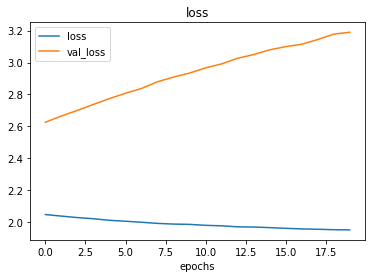

In [ ]:
# 損失を可視化
results[['loss', 'val_loss']].plot(title='loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

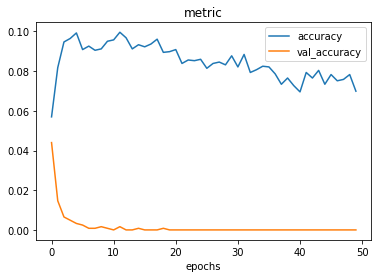

In [ ]:
# 正解率を可視化
results[['accuracy', 'val_accuracy']].plot(title='metric')
plt.xlabel('epochs')